# Projeto Guiado: Análise de Dados Básica

**Objetivo:**
Este projeto visa guiar as alunas no processo completo de análise de dados, desde a extração e tratamento até a análise e visualização, culminando na persistência dos resultados em um banco de dados SQLite. As alunas aprenderão a usar ferramentas e técnicas básicas de SQL, manipulação de dados com Pandas, e visualização com Matplotlib.

### Estrutura do Projeto

#### **Abertura e Carregamento de Dados (ETL - Extract, Transform, Load)**

1. **Extração de Dados:** 
   - Inicie o projeto extraindo dados de um arquivo CSV.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3 as sql

In [2]:
df = pd.read_csv('INMET_MS_ITAQUIRAI_2020.csv',delimiter=';',skiprows=8,encoding='latin1',skip_blank_lines=True,skipinitialspace=False)  

2. **Inspeção Inicial:**
   - Revise o conteúdo dos dados extraídos, observando as primeiras e últimas linhas, a forma e a descrição geral dos dados, e os tipos de dados.

In [3]:
df.head()

,Data,Hora UTC,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (Kj/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)",Unnamed: 19
0,2020/01/01,0000 UTC,",6",970,970,"969,5",NaN,"23,1","22,6","23,1","22,6","22,8","21,6",98.0,94.0,97.0,11.0,"3,2","1,9",NaN
1,2020/01/01,0100 UTC,0,"970,2","970,2",970,"2,9","23,7","21,7","23,7",23,"22,5","21,6",97.0,88.0,88.0,10.0,"4,6","1,3",NaN
2,2020/01/01,0200 UTC,0,"969,8","970,2","969,8","1,6",24,"21,8","24,4","23,7","21,9","21,2",88.0,83.0,88.0,345.0,"3,2",",6",NaN
3,2020/01/01,0300 UTC,0,"970,1","970,1","969,8",",6","24,3","21,4","25,1",24,22,"21,2",88.0,80.0,83.0,332.0,"4,8","1,5",NaN
4,2020/01/01,0400 UTC,0,"970,2","970,5","970,1",NaN,"23,8","21,7","24,3","23,7","21,8","21,4",89.0,83.0,89.0,316.0,"3,3",",2",NaN


In [4]:
df.tail()

,Data,Hora UTC,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (Kj/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)",Unnamed: 19
8779,2020/12/31,1900 UTC,",4","972,6","973,3","972,6","775,9","23,1","22,7","23,3","21,7",NaN,NaN,NaN,NaN,97.0,32.0,"6,6","1,2",NaN
8780,2020/12/31,2000 UTC,0,"970,4","972,6","970,4","837,8","24,2","22,7","24,4","23,1","22,8","22,1",97.0,89.0,91.0,355.0,"2,8",",8",NaN
8781,2020/12/31,2100 UTC,0,"970,7","970,7","970,1","524,7","24,9",23,"24,9","24,1","23,3","22,5",93.0,89.0,89.0,315.0,"4,2","1,2",NaN
8782,2020/12/31,2200 UTC,0,"972,4","972,4","970,7","256,5","24,2","22,1","25,1","24,2","23,1","22,1",89.0,87.0,88.0,291.0,"4,8",",9",NaN
8783,2020/12/31,2300 UTC,0,"974,1","974,1","972,4","9,6","23,5","22,5","24,2","23,4","22,5",22,94.0,88.0,94.0,132.0,"3,9",",9",NaN


In [5]:
df.describe()

,UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))",Unnamed: 19
count,8292.000000,8292.000000,8318.000000,8778.000000,0.0
mean,69.947540,63.516884,66.817264,185.015835,NaN
std,18.862049,19.718935,19.456590,81.669629,NaN
min,17.000000,13.000000,14.000000,1.000000,NaN
25%,56.000000,48.000000,52.000000,133.000000,NaN
50%,72.000000,65.000000,69.000000,171.000000,NaN
75%,86.000000,80.000000,83.000000,254.000000,NaN
max,100.000000,100.000000,100.000000,360.000000,NaN


In [6]:
df.dtypes

Data                                                      object
Hora UTC                                                  object
PRECIPITAÇÃO TOTAL, HORÁRIO (mm)                          object
PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)     object
PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)           object
PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)          object
RADIACAO GLOBAL (Kj/m²)                                   object
TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)              object
TEMPERATURA DO PONTO DE ORVALHO (°C)                      object
TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)                object
TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)                object
TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C)          object
TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C)          object
UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)                 float64
UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)                 float64
UMIDADE RELATIVA DO AR, H

In [7]:
df.shape

(8784, 20)

3. **Identificação e Tratamento de Valores Faltantes:**
   - Identifique a presença de valores nulos e trate-os adequadamente, seja removendo, preenchendo ou substituindo esses valores.

In [8]:
qtd_nulos = df.isnull().sum()

In [9]:
df = df.replace(',','.',regex=True)

In [10]:
df = df.fillna(0)

In [11]:
df.isnull().sum()

Data                                                     0
Hora UTC                                                 0
PRECIPITAÇÃO TOTAL, HORÁRIO (mm)                         0
PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)    0
PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)          0
PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)         0
RADIACAO GLOBAL (Kj/m²)                                  0
TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)             0
TEMPERATURA DO PONTO DE ORVALHO (°C)                     0
TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)               0
TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)               0
TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C)         0
TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C)         0
UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)                 0
UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)                 0
UMIDADE RELATIVA DO AR, HORARIA (%)                      0
VENTO, DIREÇÃO HORARIA (gr) (° (gr))                    

#### **Tratamento de Dados**

1. **Ajustes e Limpeza:**
   - Organize e limpe os dados, removendo duplicatas e normalizando quando necessário.

In [12]:
df = df[['Data','Hora UTC','PRECIPITAÇÃO TOTAL, HORÁRIO (mm)','TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)','TEMPERATURA DO PONTO DE ORVALHO (°C)','UMIDADE RELATIVA DO AR, HORARIA (%)','RADIACAO GLOBAL (Kj/m²)','VENTO, DIREÇÃO HORARIA (gr) (° (gr))','VENTO, VELOCIDADE HORARIA (m/s)']]
df.head()

,Data,Hora UTC,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),"UMIDADE RELATIVA DO AR, HORARIA (%)",RADIACAO GLOBAL (Kj/m²),"VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, VELOCIDADE HORARIA (m/s)"
0,2020/01/01,0000 UTC,.6,23.1,22.6,97.0,0,11.0,1.9
1,2020/01/01,0100 UTC,0,23.7,21.7,88.0,2.9,10.0,1.3
2,2020/01/01,0200 UTC,0,24,21.8,88.0,1.6,345.0,.6
3,2020/01/01,0300 UTC,0,24.3,21.4,83.0,.6,332.0,1.5
4,2020/01/01,0400 UTC,0,23.8,21.7,89.0,0,316.0,.2


In [13]:
df.shape

(8784, 9)

In [14]:
df = df.drop_duplicates()

In [15]:
df.shape #não há linhas duplicadas

(8784, 9)

In [16]:
df['UMIDADE RELATIVA DO AR, HORARIA (%)'] = (df['UMIDADE RELATIVA DO AR, HORARIA (%)'] - df['UMIDADE RELATIVA DO AR, HORARIA (%)'].min()) / (df['UMIDADE RELATIVA DO AR, HORARIA (%)'].max() - df['UMIDADE RELATIVA DO AR, HORARIA (%)'].min())

In [17]:
df.head()

,Data,Hora UTC,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),"UMIDADE RELATIVA DO AR, HORARIA (%)",RADIACAO GLOBAL (Kj/m²),"VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, VELOCIDADE HORARIA (m/s)"
0,2020/01/01,0000 UTC,.6,23.1,22.6,0.97,0,11.0,1.9
1,2020/01/01,0100 UTC,0,23.7,21.7,0.88,2.9,10.0,1.3
2,2020/01/01,0200 UTC,0,24,21.8,0.88,1.6,345.0,.6
3,2020/01/01,0300 UTC,0,24.3,21.4,0.83,.6,332.0,1.5
4,2020/01/01,0400 UTC,0,23.8,21.7,0.89,0,316.0,.2


2. **Renomeação e Ajuste de Colunas:**
   - Renomeie colunas e ajuste os tipos de dados conforme necessário para garantir a consistência e clareza.

In [18]:
df = df.rename(columns={
    'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)' : 'PRECIPITAÇÃO TOTAL/HORÁRIO (mm)',
    'VENTO, DIREÇÃO HORARIA (gr) (° (gr))' : 'VENTO, DIREÇÃO HORARIA (°gr)'
})

In [19]:
df.head()

,Data,Hora UTC,PRECIPITAÇÃO TOTAL/HORÁRIO (mm),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),"UMIDADE RELATIVA DO AR, HORARIA (%)",RADIACAO GLOBAL (Kj/m²),"VENTO, DIREÇÃO HORARIA (°gr)","VENTO, VELOCIDADE HORARIA (m/s)"
0,2020/01/01,0000 UTC,.6,23.1,22.6,0.97,0,11.0,1.9
1,2020/01/01,0100 UTC,0,23.7,21.7,0.88,2.9,10.0,1.3
2,2020/01/01,0200 UTC,0,24,21.8,0.88,1.6,345.0,.6
3,2020/01/01,0300 UTC,0,24.3,21.4,0.83,.6,332.0,1.5
4,2020/01/01,0400 UTC,0,23.8,21.7,0.89,0,316.0,.2


In [20]:
df.dtypes

Data                                             object
Hora UTC                                         object
PRECIPITAÇÃO TOTAL/HORÁRIO (mm)                  object
TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)     object
TEMPERATURA DO PONTO DE ORVALHO (°C)             object
UMIDADE RELATIVA DO AR, HORARIA (%)             float64
RADIACAO GLOBAL (Kj/m²)                          object
VENTO, DIREÇÃO HORARIA (°gr)                    float64
VENTO, VELOCIDADE HORARIA (m/s)                  object
dtype: object

In [21]:
coluna_objeto = df.select_dtypes(include = ['object']).columns
coluna_objeto = coluna_objeto.drop(['Data','Hora UTC'])
for coluna in coluna_objeto:
    df[coluna] = pd.to_numeric(df[coluna], errors='coerce')

In [22]:
df.dtypes

Data                                             object
Hora UTC                                         object
PRECIPITAÇÃO TOTAL/HORÁRIO (mm)                 float64
TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)    float64
TEMPERATURA DO PONTO DE ORVALHO (°C)            float64
UMIDADE RELATIVA DO AR, HORARIA (%)             float64
RADIACAO GLOBAL (Kj/m²)                         float64
VENTO, DIREÇÃO HORARIA (°gr)                    float64
VENTO, VELOCIDADE HORARIA (m/s)                 float64
dtype: object

3. **Transformações e Criação de Novas Colunas:**
   - Realize transformações relevantes nos dados, como criar novas colunas derivadas de outras existentes.

In [23]:
df_data=pd.to_datetime(df['Data'])

In [24]:
df['Data'] = df_data.dt.strftime('%d/%m/%Y')

In [25]:
df['Hora UTC'] = pd.to_datetime(df['Hora UTC'], format='%H%M UTC', errors='coerce').dt.strftime('%H:%M')

In [26]:
df['Data e Hora'] = df['Data'] + ' ' + df['Hora UTC']

In [27]:
df['Data e Hora'] = pd.to_datetime(df['Data e Hora'],errors='coerce')

In [28]:
df['Data e Hora BR'] = df['Data e Hora'].dt.tz_localize('UTC').dt.tz_convert('America/Sao_Paulo').dt.strftime('%d/%m/%Y %H:%M')

In [29]:
df = df[['Data','Hora UTC','Data e Hora','Data e Hora BR','PRECIPITAÇÃO TOTAL/HORÁRIO (mm)','TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)','TEMPERATURA DO PONTO DE ORVALHO (°C)','UMIDADE RELATIVA DO AR, HORARIA (%)','RADIACAO GLOBAL (Kj/m²)','VENTO, DIREÇÃO HORARIA (°gr)','VENTO, VELOCIDADE HORARIA (m/s)']]
df.head()

,Data,Hora UTC,Data e Hora,Data e Hora BR,PRECIPITAÇÃO TOTAL/HORÁRIO (mm),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),"UMIDADE RELATIVA DO AR, HORARIA (%)",RADIACAO GLOBAL (Kj/m²),"VENTO, DIREÇÃO HORARIA (°gr)","VENTO, VELOCIDADE HORARIA (m/s)"
0,01/01/2020,00:00,2020-01-01 00:00:00,31/12/2019 21:00,0.6,23.1,22.6,0.97,0.0,11.0,1.9
1,01/01/2020,01:00,2020-01-01 01:00:00,31/12/2019 22:00,0.0,23.7,21.7,0.88,2.9,10.0,1.3
2,01/01/2020,02:00,2020-01-01 02:00:00,31/12/2019 23:00,0.0,24.0,21.8,0.88,1.6,345.0,0.6
3,01/01/2020,03:00,2020-01-01 03:00:00,01/01/2020 00:00,0.0,24.3,21.4,0.83,0.6,332.0,1.5
4,01/01/2020,04:00,2020-01-01 04:00:00,01/01/2020 01:00,0.0,23.8,21.7,0.89,0.0,316.0,0.2


#### **Análise de Dados**

1. **Geração de Insights Estatísticos:**
   - Utilize técnicas estatísticas para entender os dados, como calcular somas, médias e identificar valores máximos e mínimos.

In [30]:
df.describe()

,PRECIPITAÇÃO TOTAL/HORÁRIO (mm),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),"UMIDADE RELATIVA DO AR, HORARIA (%)",RADIACAO GLOBAL (Kj/m²),"VENTO, DIREÇÃO HORARIA (°gr)","VENTO, VELOCIDADE HORARIA (m/s)"
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,0.151480,23.172837,15.201423,0.632725,759.334028,184.889458,1.939447
std,1.375679,5.725963,5.592551,0.241409,1077.034129,81.784719,1.405233
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,19.500000,12.400000,0.490000,0.000000,133.000000,0.900000
50%,0.000000,23.100000,16.000000,0.670000,23.100000,171.000000,1.800000
75%,0.000000,27.100000,19.300000,0.820000,1434.250000,254.000000,2.800000
max,44.800000,40.600000,25.800000,1.000000,4085.400000,360.000000,11.900000


In [31]:
coluna_objeto = df.select_dtypes(include = ['float64']).columns
for coluna in coluna_objeto:
    print(f'A soma da coluna {df[coluna].name}: {round(df[coluna].sum(),2)}')

A soma da coluna PRECIPITAÇÃO TOTAL/HORÁRIO (mm): 1330.6
A soma da coluna TEMPERATURA DO AR - BULBO SECO, HORARIA (°C): 203550.2
A soma da coluna TEMPERATURA DO PONTO DE ORVALHO (°C): 133529.3
A soma da coluna UMIDADE RELATIVA DO AR, HORARIA (%): 5557.86
A soma da coluna RADIACAO GLOBAL (Kj/m²): 6669990.1
A soma da coluna VENTO, DIREÇÃO HORARIA (°gr): 1624069.0
A soma da coluna VENTO, VELOCIDADE HORARIA (m/s): 17036.1


In [32]:
coluna_objeto = df.select_dtypes(include = ['float64']).columns
for coluna in coluna_objeto:
    print(f'A média da coluna {df[coluna].name}: {round(df[coluna].mean(),2)}')

A média da coluna PRECIPITAÇÃO TOTAL/HORÁRIO (mm): 0.15
A média da coluna TEMPERATURA DO AR - BULBO SECO, HORARIA (°C): 23.17
A média da coluna TEMPERATURA DO PONTO DE ORVALHO (°C): 15.2
A média da coluna UMIDADE RELATIVA DO AR, HORARIA (%): 0.63
A média da coluna RADIACAO GLOBAL (Kj/m²): 759.33
A média da coluna VENTO, DIREÇÃO HORARIA (°gr): 184.89
A média da coluna VENTO, VELOCIDADE HORARIA (m/s): 1.94


In [33]:
coluna_objeto = df.select_dtypes(include = ['float64']).columns
for coluna in coluna_objeto:
    print(f'O valor máximo da coluna {df[coluna].name}: {round(df[coluna].max(),2)}')

O valor máximo da coluna PRECIPITAÇÃO TOTAL/HORÁRIO (mm): 44.8
O valor máximo da coluna TEMPERATURA DO AR - BULBO SECO, HORARIA (°C): 40.6
O valor máximo da coluna TEMPERATURA DO PONTO DE ORVALHO (°C): 25.8
O valor máximo da coluna UMIDADE RELATIVA DO AR, HORARIA (%): 1.0
O valor máximo da coluna RADIACAO GLOBAL (Kj/m²): 4085.4
O valor máximo da coluna VENTO, DIREÇÃO HORARIA (°gr): 360.0
O valor máximo da coluna VENTO, VELOCIDADE HORARIA (m/s): 11.9


In [34]:
coluna_objeto = df.select_dtypes(include = ['float64']).columns
for coluna in coluna_objeto:
    print(f'O valor mínimo da coluna {df[coluna].name}: {round(df[coluna].min(),2)}')

O valor mínimo da coluna PRECIPITAÇÃO TOTAL/HORÁRIO (mm): 0.0
O valor mínimo da coluna TEMPERATURA DO AR - BULBO SECO, HORARIA (°C): 0.0
O valor mínimo da coluna TEMPERATURA DO PONTO DE ORVALHO (°C): 0.0
O valor mínimo da coluna UMIDADE RELATIVA DO AR, HORARIA (%): 0.0
O valor mínimo da coluna RADIACAO GLOBAL (Kj/m²): 0.0
O valor mínimo da coluna VENTO, DIREÇÃO HORARIA (°gr): 0.0
O valor mínimo da coluna VENTO, VELOCIDADE HORARIA (m/s): 0.0


2. **Agrupamento e Sumarização:**
   - Agrupe os dados para identificar padrões e tendências, gerando sumarizações que permitam uma análise mais profunda.

In [35]:
df.head()

,Data,Hora UTC,Data e Hora,Data e Hora BR,PRECIPITAÇÃO TOTAL/HORÁRIO (mm),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),"UMIDADE RELATIVA DO AR, HORARIA (%)",RADIACAO GLOBAL (Kj/m²),"VENTO, DIREÇÃO HORARIA (°gr)","VENTO, VELOCIDADE HORARIA (m/s)"
0,01/01/2020,00:00,2020-01-01 00:00:00,31/12/2019 21:00,0.6,23.1,22.6,0.97,0.0,11.0,1.9
1,01/01/2020,01:00,2020-01-01 01:00:00,31/12/2019 22:00,0.0,23.7,21.7,0.88,2.9,10.0,1.3
2,01/01/2020,02:00,2020-01-01 02:00:00,31/12/2019 23:00,0.0,24.0,21.8,0.88,1.6,345.0,0.6
3,01/01/2020,03:00,2020-01-01 03:00:00,01/01/2020 00:00,0.0,24.3,21.4,0.83,0.6,332.0,1.5
4,01/01/2020,04:00,2020-01-01 04:00:00,01/01/2020 01:00,0.0,23.8,21.7,0.89,0.0,316.0,0.2


In [36]:
agrupado_data_media = df.groupby('Data')[['PRECIPITAÇÃO TOTAL/HORÁRIO (mm)','TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)','TEMPERATURA DO PONTO DE ORVALHO (°C)','UMIDADE RELATIVA DO AR, HORARIA (%)','RADIACAO GLOBAL (Kj/m²)','VENTO, DIREÇÃO HORARIA (°gr)','VENTO, VELOCIDADE HORARIA (m/s)']].mean()
agrupado_data_media

,PRECIPITAÇÃO TOTAL/HORÁRIO (mm),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),"UMIDADE RELATIVA DO AR, HORARIA (%)",RADIACAO GLOBAL (Kj/m²),"VENTO, DIREÇÃO HORARIA (°gr)","VENTO, VELOCIDADE HORARIA (m/s)"
Data,,,,,,,
01/01/2020,0.450000,26.150000,20.833333,0.748750,1002.500000,191.625000,1.420833
01/02/2020,0.091667,25.191667,23.120833,0.885417,454.445833,138.333333,1.033333
01/03/2020,0.000000,25.237500,18.116667,0.662083,1097.037500,210.625000,1.879167
01/04/2020,0.000000,26.945833,19.658333,0.671667,900.695833,181.708333,1.550000
01/05/2020,0.000000,23.466667,14.679167,0.612083,686.691667,171.750000,0.479167
...,...,...,...,...,...,...,...
31/05/2020,0.000000,21.408333,13.037500,0.611250,549.700000,119.291667,1.487500
31/07/2020,0.000000,18.504167,12.954167,0.716250,649.204167,188.250000,2.504167
31/08/2020,0.000000,24.550000,14.025000,0.562917,831.391667,174.500000,1.554167


#### **Visualização de Dados com Matplotlib**

1. **Criação de Gráficos Básicos:**
   - Visualize os dados através de gráficos, como histogramas e gráficos de barras, para facilitar a compreensão das análises realizadas.

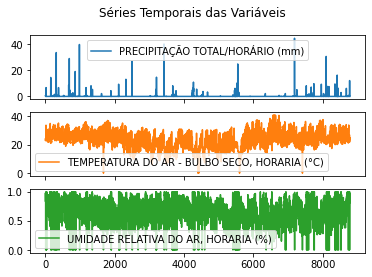

In [37]:
df[['PRECIPITAÇÃO TOTAL/HORÁRIO (mm)', 'TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)',
    'UMIDADE RELATIVA DO AR, HORARIA (%)']].plot(subplots=True)
plt.suptitle('Séries Temporais das Variáveis')
plt.show()

2. **Customização de Gráficos:**
   - Personalize os gráficos, adicionando títulos, legendas e ajustando as cores para torná-los mais informativos.

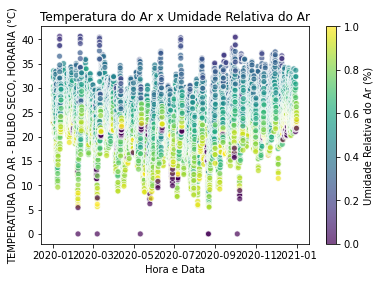

In [38]:
plt.scatter(df['Data e Hora'] ,df['TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)'],
            c=df['UMIDADE RELATIVA DO AR, HORARIA (%)'],  
            cmap='viridis',  
            alpha=0.7,  
            edgecolors='w')
plt.colorbar(label='Umidade Relativa do Ar (%)')

plt.title('Temperatura do Ar x Umidade Relativa do Ar')
plt.xlabel('Hora e Data')
plt.ylabel('TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)')
plt.show()

#### **Persistência dos Resultados no SQLite**

1. **Criação do Banco de Dados:**
   - Estabeleça um banco de dados SQLite para armazenar os resultados das análises.

In [39]:
conn = sql.connect('clima.db')

# persistindo o DataFrame no banco de dados
df.to_sql('clima', conn, if_exists='replace')

c:\Users\Jamile\anaconda3\lib\site-packages\pandas\core\generic.py:2872: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  sql.to_sql(


2. **Salvamento dos Dados Tratados:**
   - Salve os dados tratados e os resultados das análises em tabelas dentro do banco de dados.

In [40]:
cursor = conn.cursor()
cursor.execute('SELECT * FROM clima')

col_names = [description[0] for description in cursor.description]

df_db = pd.DataFrame(cursor.fetchall(), columns=col_names)

df_db

,index,Data,Hora UTC,Data e Hora,Data e Hora BR,PRECIPITAÇÃO TOTAL/HORÁRIO (mm),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),"UMIDADE RELATIVA DO AR, HORARIA (%)",RADIACAO GLOBAL (Kj/m²),"VENTO, DIREÇÃO HORARIA (°gr)","VENTO, VELOCIDADE HORARIA (m/s)"
0,0,01/01/2020,00:00,2020-01-01 00:00:00,31/12/2019 21:00,0.6,23.1,22.6,0.97,0.0,11.0,1.9
1,1,01/01/2020,01:00,2020-01-01 01:00:00,31/12/2019 22:00,0.0,23.7,21.7,0.88,2.9,10.0,1.3
2,2,01/01/2020,02:00,2020-01-01 02:00:00,31/12/2019 23:00,0.0,24.0,21.8,0.88,1.6,345.0,0.6
3,3,01/01/2020,03:00,2020-01-01 03:00:00,01/01/2020 00:00,0.0,24.3,21.4,0.83,0.6,332.0,1.5
4,4,01/01/2020,04:00,2020-01-01 04:00:00,01/01/2020 01:00,0.0,23.8,21.7,0.89,0.0,316.0,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...
8779,8779,31/12/2020,19:00,2020-12-31 19:00:00,31/12/2020 16:00,0.4,23.1,22.7,0.97,775.9,32.0,1.2
8780,8780,31/12/2020,20:00,2020-12-31 20:00:00,31/12/2020 17:00,0.0,24.2,22.7,0.91,837.8,355.0,0.8
8781,8781,31/12/2020,21:00,2020-12-31 21:00:00,31/12/2020 18:00,0.0,24.9,23.0,0.89,524.7,315.0,1.2
8782,8782,31/12/2020,22:00,2020-12-31 22:00:00,31/12/2020 19:00,0.0,24.2,22.1,0.88,256.5,291.0,0.9


#### **Finalização do Projeto**

**Perguntas para Reflexão:**
Ao final do projeto, as alunas devem refletir sobre as seguintes questões baseadas nos dados analisados:


1. Qual foi a média de valores de uma coluna específica?
2. Qual o total de registros após a limpeza dos dados?
3. Quais foram os valores máximos e mínimos identificados?
4. Quantos registros tinham valores nulos antes do tratamento?
5. Qual foi o impacto da normalização de uma coluna específica?
6. Que padrões emergiram após a análise dos dados?
7. Como os dados foram agrupados e quais insights foram gerados?
8. Quais visualizações forneceram as informações mais valiosas?
9. Como o uso de SQL contribuiu para a organização dos resultados?
10. De que forma os gráficos ajudaram na compreensão dos dados?

In [41]:
df.head()


,Data,Hora UTC,Data e Hora,Data e Hora BR,PRECIPITAÇÃO TOTAL/HORÁRIO (mm),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),"UMIDADE RELATIVA DO AR, HORARIA (%)",RADIACAO GLOBAL (Kj/m²),"VENTO, DIREÇÃO HORARIA (°gr)","VENTO, VELOCIDADE HORARIA (m/s)"
0,01/01/2020,00:00,2020-01-01 00:00:00,31/12/2019 21:00,0.6,23.1,22.6,0.97,0.0,11.0,1.9
1,01/01/2020,01:00,2020-01-01 01:00:00,31/12/2019 22:00,0.0,23.7,21.7,0.88,2.9,10.0,1.3
2,01/01/2020,02:00,2020-01-01 02:00:00,31/12/2019 23:00,0.0,24.0,21.8,0.88,1.6,345.0,0.6
3,01/01/2020,03:00,2020-01-01 03:00:00,01/01/2020 00:00,0.0,24.3,21.4,0.83,0.6,332.0,1.5
4,01/01/2020,04:00,2020-01-01 04:00:00,01/01/2020 01:00,0.0,23.8,21.7,0.89,0.0,316.0,0.2


In [42]:
#1. Qual foi a média de valores de uma coluna específica?
media_column_5 = df['TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)'].mean()
print(f'Média da coluna {df.columns[5]} é = {round(media_column_5,2)}')

Média da coluna TEMPERATURA DO AR - BULBO SECO, HORARIA (°C) é = 23.17


In [43]:
# 2. Qual o total de registros após a limpeza dos dados?
linhas = df.shape[0]
colunas = df.shape[1]
elementos = df.size
print(f'''Quantidade de linhas: {linhas}
Quantidade de colunas: {colunas}
Quantidade de elementos: {elementos}    
''')
print(elementos)

Quantidade de linhas: 8784
Quantidade de colunas: 11
Quantidade de elementos: 96624    

96624


In [44]:
# 3. Quais foram os valores máximos e mínimos identificados?
maximo = df.max()
minimo = df.min()
print(f'''
Valores máximos de cada coluna:
      
{maximo}

Valores mínimos de cada coluna:
Os valores mínimos de todas as colunas será 0 por ter optado preencher
os espaçoes vazios com 0

{minimo}
''')


Valores máximos de cada coluna:
      
Data                                                     31/12/2020
Hora UTC                                                      23:00
Data e Hora                                     2020-12-31 23:00:00
Data e Hora BR                                     31/12/2020 20:00
PRECIPITAÇÃO TOTAL/HORÁRIO (mm)                                44.8
TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)                   40.6
TEMPERATURA DO PONTO DE ORVALHO (°C)                           25.8
UMIDADE RELATIVA DO AR, HORARIA (%)                             1.0
RADIACAO GLOBAL (Kj/m²)                                      4085.4
VENTO, DIREÇÃO HORARIA (°gr)                                  360.0
VENTO, VELOCIDADE HORARIA (m/s)                                11.9
dtype: object

Valores mínimos de cada coluna:
Os valores mínimos de todas as colunas será 0 por ter optado preencher
os espaçoes vazios com 0

Data                                                     01/01/2020


In [45]:
# 4. Quantos registros tinham valores nulos antes do tratamento?
print(f'''Quantidade de nulos em cada coluna antes do tratamentos:

{qtd_nulos}      
''')

Quantidade de nulos em cada coluna antes do tratamentos:

Data                                                        0
Hora UTC                                                    0
PRECIPITAÇÃO TOTAL, HORÁRIO (mm)                            6
PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)       6
PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)             6
PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)            6
RADIACAO GLOBAL (Kj/m²)                                  4049
TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)                6
TEMPERATURA DO PONTO DE ORVALHO (°C)                      466
TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)                  6
TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)                 88
TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C)          495
TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C)          495
UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)                  492
UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)                  492
UMIDADE RELA

In [46]:
# 5. Qual foi o impacto da normalização de uma coluna específica?
print('''
Ao Normaizar os dados, nos certificamos que o intevalo será entre 0 e 1 ou -1 e 1
Conforme podemos observar nos gráficos abaixo, houve mudança apenas de escala.
Antes da normalização o numeros eram apresentado em %, variando de 0 a 100
''')


Ao Normaizar os dados, nos certificamos que o intevalo será entre 0 e 1 ou -1 e 1
Conforme podemos observar nos gráficos abaixo, houve mudança apenas de escala.
Antes da normalização o numeros eram apresentado em %, variando de 0 a 100




Coluna sem normalização: 


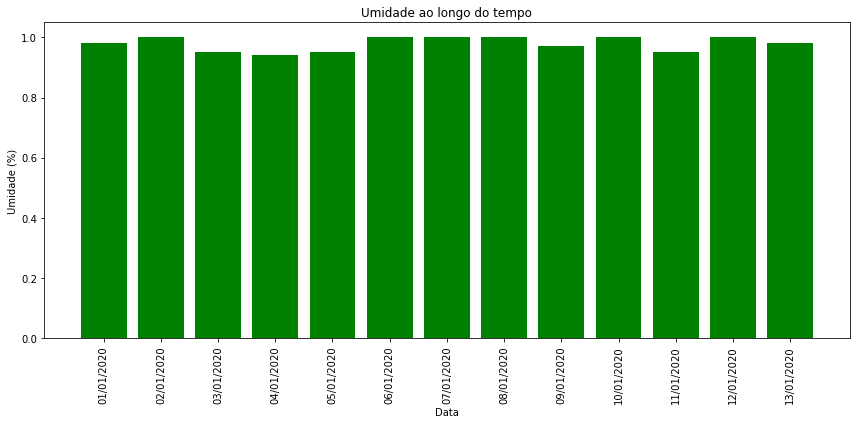

In [54]:
# 5. Qual foi o impacto da normalização de uma coluna específica?
df2 = pd.read_csv('INMET_MS_ITAQUIRAI_2020.csv',delimiter=';',skiprows=8,encoding='latin1',skip_blank_lines=True,skipinitialspace=False)  
df2 = df.replace(',','.',regex=True)
df_2 = df2.fillna(0)

df_2['UMIDADE RELATIVA DO AR, HORARIA (%)'] = pd.to_numeric(df_2['UMIDADE RELATIVA DO AR, HORARIA (%)'], errors='coerce')
df_2_300 = df_2.head(300)

df_2_300 = df_2_300.sort_values('Data',ascending=True)

print('\nColuna sem normalização: ')
plt.figure(figsize=(12, 6))
plt.bar(df_2_300['Data'], df_2_300['UMIDADE RELATIVA DO AR, HORARIA (%)'], color='g')
plt.xlabel('Data')
plt.ylabel('Umidade (%)')
plt.title('Umidade ao longo do tempo')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


Coluna normalizada: 


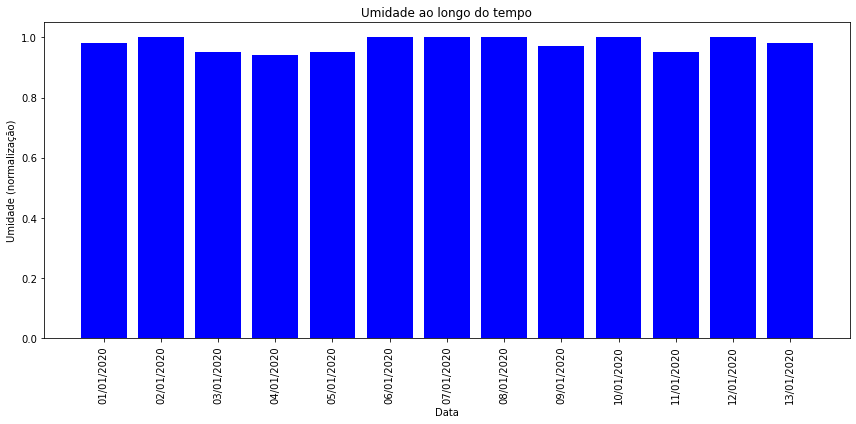

In [ ]:
# 5. Qual foi o impacto da normalização de uma coluna específica?
df_300 = df.head(300)
df_300 = df_300.sort_values('Data',ascending=True)

print('\nColuna normalizada: ')
plt.figure(figsize=(12, 6))
plt.bar(df_300['Data'], df_300['UMIDADE RELATIVA DO AR, HORARIA (%)'], color='b')
plt.xlabel('Data')
plt.ylabel('Umidade (normalização)')
plt.title('Umidade ao longo do tempo')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [ ]:
# 6. Que padrões emergiram após a análise dos dados?
print('''
De acordo com a amostra (300), a umidade do ar ao longo do tempo apresenta um padrão 
em que todos os dias apresentados na visualização estão acima da média            
''')
df_300.describe()


De acordo com a amostra (300), a umidade do ar ao longo do tempo apresenta um padrão 
em que todos os dias apresentados na visualização estão acima da média            



,PRECIPITAÇÃO TOTAL/HORÁRIO (mm),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),"UMIDADE RELATIVA DO AR, HORARIA (%)",RADIACAO GLOBAL (Kj/m²),"VENTO, DIREÇÃO HORARIA (°gr)","VENTO, VELOCIDADE HORARIA (m/s)"
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,0.228000,26.227667,20.308333,0.718733,849.381333,168.826667,1.889333
std,1.415921,3.299843,6.642221,0.266771,1140.680532,97.398966,1.307690
min,0.000000,20.800000,0.000000,0.000000,0.000000,2.000000,0.000000
25%,0.000000,23.600000,21.100000,0.650000,0.000000,87.000000,1.000000
50%,0.000000,25.500000,22.300000,0.790000,126.500000,147.500000,1.700000
75%,0.000000,28.725000,23.325000,0.900000,1626.750000,246.250000,2.700000
max,14.600000,34.700000,24.900000,1.000000,3810.200000,358.000000,8.500000


In [ ]:
# 7. Como os dados foram agrupados e quais insights foram gerados?
print(f'''
Os dados foram agrupados através da data com as médias dos dados das colunas.
Pude verificar como as médias dos dados em diferentes dias são diferentes, como por exemplo,
o desvio padrão das médias ao longo dos dias da coluna "Radiação Global" é: {round(agrupado_data_media['RADIACAO GLOBAL (Kj/m²)'].std(),2)}      
''')





Os dados foram agrupados através da data com as médias dos dados das colunas.
Pude verificar como as médias dos dados em diferentes dias são diferentes, como por exemplo,
o desvio padrão das médias ao longo dos dias da coluna "Radiação Global" é: 286.74      



In [ ]:
# 8. Quais visualizações forneceram as informações mais valiosas?
print('''
As visualizações que demonstraram as colunas dod tipo float com relação ao longo do tempo    
''')


As visualizações que demonstraram as colunas dod tipo float com relação ao longo do tempo    



In [ ]:
# 9. Como o uso de SQL contribuiu para a organização dos resultados?
print('''
Nesse projeto especificamente, me ajudou a armazenar os dados de forma em que eu possa
consultar/armazenar/manipular os dados a qlqr momento.      
''')


Nesse projeto especificamente, me ajudou a armazenar os dados de forma em que eu possa
consultar/armazenar/manipular os dados a qlqr momento.      



In [ ]:
# 10. De que forma os gráficos ajudaram na compreensão dos dados?
print('''
Os gráficos dão maior clareza no momento de analisar o que os dados representam e significam    
''')


Os gráficos dão maior clareza no momento de analisar o que os dados representam e significam    

